In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the S&P500 dataset
df=pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Exercise\\Sp500.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [117]:
#Checking the datatype of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23121 entries, 0 to 23120
Data columns (total 7 columns):
Date         23121 non-null object
Open         23121 non-null float64
High         23121 non-null float64
Low          23121 non-null float64
Close        23121 non-null float64
Adj Close    23121 non-null float64
Volume       23121 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [118]:
#Changing the datatype of Date Column from Object to DateTime format
df_d=df.copy()
df_d.loc[:,'Date']=pd.to_datetime(df.loc[:,'Date'],format="%Y/%m/%d")
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23121 entries, 0 to 23120
Data columns (total 7 columns):
Date         23121 non-null datetime64[ns]
Open         23121 non-null float64
High         23121 non-null float64
Low          23121 non-null float64
Close        23121 non-null float64
Adj Close    23121 non-null float64
Volume       23121 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 MB


Text(0.5, 1.0, 'Index History')

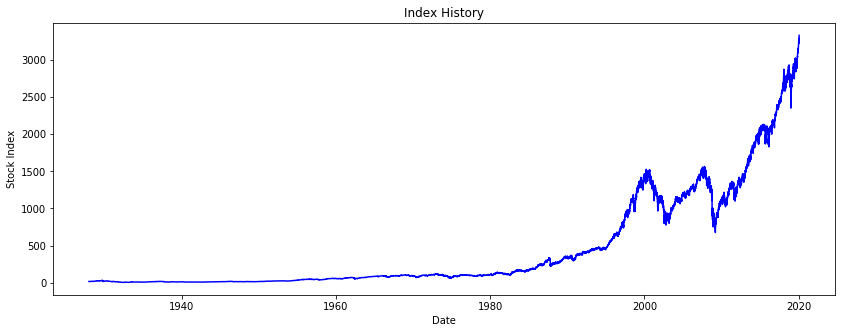

In [119]:
#Visualizing the Index History Trend
f,(ax1)=plt.subplots(figsize=(14,5))
ax1.plot(df_d['Date'],df_d['Close'],color="blue")
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Index')
ax1.set_title('Index History')

In [120]:
#Only taking data after 1990 because before 1990 there is no significant rate of change
df_d.drop(df_d[df_d['Date']<'1990-1-1'].index,axis=0,inplace=True)
df_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
15550,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
15551,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
15552,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
15553,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
15554,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [121]:
#Droping all the irrelevant columns
df_d.drop(df_d[['Open','High','Low','Adj Close','Volume']].columns,axis=1,inplace=True)
df_d.head()

,Date,Close
15550,1990-01-02,359.690002
15551,1990-01-03,358.760010
15552,1990-01-04,355.670013
15553,1990-01-05,352.200012
15554,1990-01-08,353.790009


Text(0.5, 1.0, 'Index History')

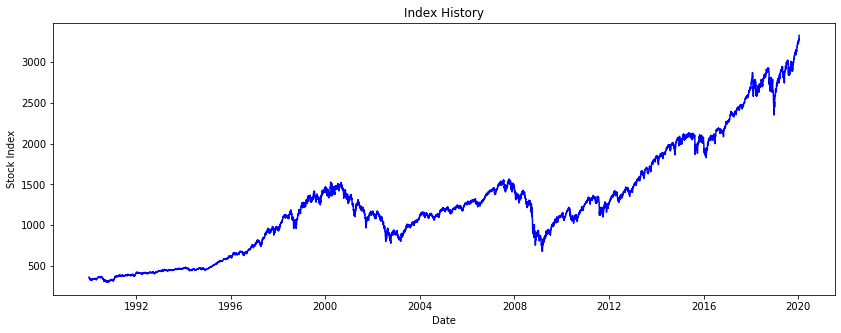

In [273]:
#Visualizing the Index History Trend after 1990
f,(ax1)=plt.subplots(figsize=(14,5))
ax1.plot(df_n['Date'],df_n['Close'],color="blue")
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Index')
ax1.set_title('Index History')

In [143]:
#Setting Date as Index
df_d = df_d.set_index(pd.DatetimeIndex(df_d['Date']))
df_d.head(1)

,Date,Close
Date,,
1990-01-02,1990-01-02,359.690002


In [146]:
#Resampling the data as per weeks
df_w=df_d.resample('W').mean()
df_w.head()

,Close
Date,
1990-01-07,356.580009
1990-01-14,347.835999
1990-01-21,338.497998
1990-01-28,328.825995
1990-02-04,327.394006


In [135]:
#Resetting the index to int64 
df_w.reset_index(inplace=True)
df_w.head()

,Date,Close
0,1990-01-07,356.580009
1,1990-01-14,347.835999
2,1990-01-21,338.497998
3,1990-01-28,328.825995
4,1990-02-04,327.394006


In [136]:
#Resampling the data as per months
df_m=df_d.resample('M').mean()
df_m.reset_index(inplace=True)
df_m.head()

,Date,Close
0,1990-01-31,339.971818
1,1990-02-28,330.452635
2,1990-03-31,338.465000
3,1990-04-30,338.177998
4,1990-05-31,350.250001


In [137]:
#Resampling the data as per years
df_y=df_d.resample('Y').mean()
df_y.reset_index(inplace=True)
df_y.head()

,Date,Close
0,1990-12-31,334.632056
1,1991-12-31,376.186324
2,1992-12-31,415.747008
3,1993-12-31,451.614821
4,1994-12-31,460.416508


In [148]:
#Resetting the index to int64 for daily data
df_d.reset_index(drop=True,inplace=True)
df_d.head()

,Date,Close
0,1990-01-02,359.690002
1,1990-01-03,358.760010
2,1990-01-04,355.670013
3,1990-01-05,352.200012
4,1990-01-08,353.790009


In [149]:
df_d.tail()

,Date,Close
7566,2020-01-13,3288.129883
7567,2020-01-14,3283.149902
7568,2020-01-15,3289.290039
7569,2020-01-16,3316.810059
7570,2020-01-17,3329.620117


In [163]:
#Splitting the data into train and test
train_data_d, test_data_d = df_d[0:int(len(df_d)*0.8)], df_d[int(len(df_d)*0.8):]

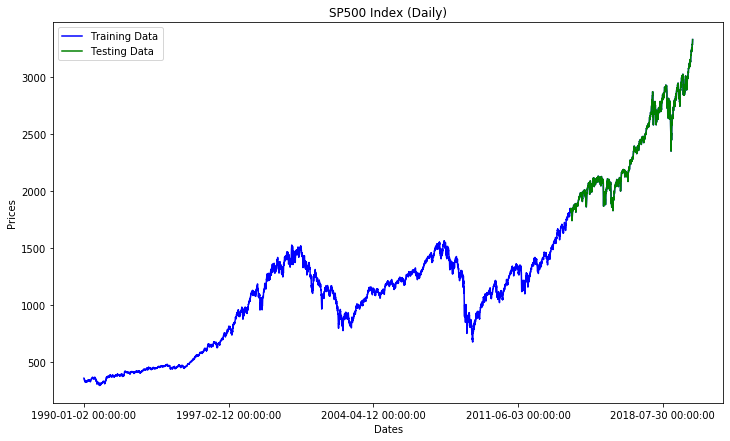

In [187]:
#graph for train and test for daily wise data
import numpy as np
plt.figure(figsize=(12,7))
plt.title('SP500 Index (Daily)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_d['Close'],'blue', label='Training Data')
plt.plot(test_data_d['Close'],'green', label='Testing Data')
plt.xticks(np.arange(0,7570,1800),df_d['Date'][0:7570:1800])
plt.legend()
plt.show()

In [178]:
#Using ARIMA model on daily wise data and calculating perfomance metrics
from statsmodels.tsa.arima_model import ARIMA
train_ar_d = train_data_d['Close'].values
test_ar_d = test_data_d['Close'].values
history = [x for x in train_ar_d]
print(type(history))
predictions_d = list()
for t in range(len(test_ar_d)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_d.append(yhat)
    obs = test_ar_d[t]
    history.append(obs)
from sklearn import metrics
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
error = metrics.mean_squared_error(test_ar_d, predictions_d)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_d, predictions_d)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_d, predictions_d)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_d, predictions_d)
print('R2-Score:%.3f'% R2Score) 

<class 'list'>
Mean Squared Error: 382.314
Symmetric Mean Absolute Percentage Error: 18.197
Mean Absolute Percenatage Error:18.620
R2-Score:0.997


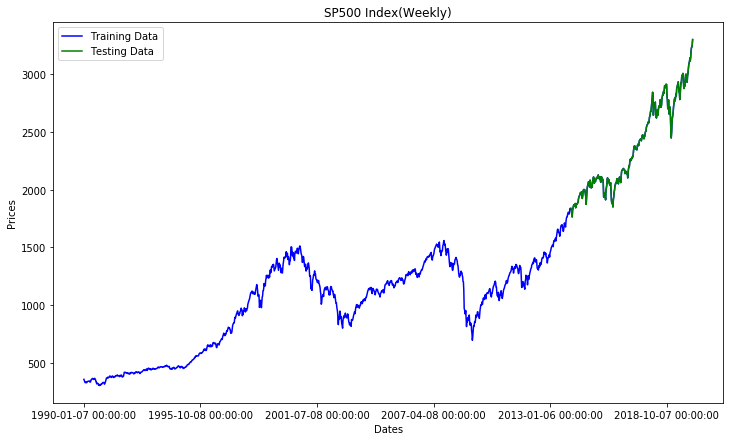

In [275]:
#graph for train and test for weekly wise data
train_data_w, test_data_w = df_w[0:int(len(df_w)*0.8)], df_w[int(len(df_w)*0.8):]
plt.figure(figsize=(12,7))
plt.title('SP500 Index(Weekly)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_w['Close'],'blue', label='Training Data')
plt.plot(test_data_w['Close'],'green', label='Testing Data')
plt.xticks(np.arange(0,1800,300),df_w['Date'][0:1800:300])
plt.legend()
plt.show()

In [276]:
#Using ARIMA model on weekly wise data and calculating perfomance metrics
train_ar_w = train_data_w['Close'].values
test_ar_w = test_data_w['Close'].values
history = [x for x in train_ar_w]
print(type(history))
predictions_w = list()
for t in range(len(test_ar_w)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_w.append(yhat)
    obs = test_ar_w[t]
    history.append(obs)
print('Weekly Basis Forecasting Perfomance')
error = metrics.mean_squared_error(test_ar_w, predictions_w)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_w, predictions_w)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_w, predictions_w)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_w, predictions_w)
print('R2-Score:%.3f'% R2Score) 

<class 'list'>
Weekly Basis Forecasting Perfomance
Mean Squared Error: 1061.665
Symmetric Mean Absolute Percentage Error: 18.154
Mean Absolute Percenatage Error:18.556
R2-Score:0.993


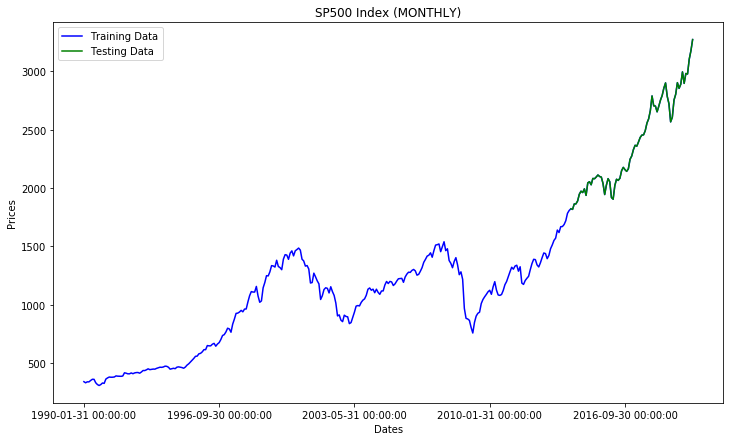

In [199]:
#graph for train and test for monthly wise data
train_data_m, test_data_m = df_m[0:int(len(df_m)*0.8)], df_m[int(len(df_m)*0.8):]
plt.figure(figsize=(12,7))
plt.title('SP500 Index (MONTHLY)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_m['Close'],'blue', label='Training Data')
plt.plot(test_data_m['Close'],'green', label='Testing Data')
plt.xticks(np.arange(0,400,80),df_m['Date'][0:400:80])
plt.legend()
plt.show()

In [242]:
#Using ARIMA model on monthly wise data and calculating perfomance metrics
train_ar_m = train_data_m['Close'].values
test_ar_m = test_data_m['Close'].values
history = [x for x in train_ar_m]
print(type(history))
predictions_m = list()
for t in range(len(test_ar_m)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_m.append(yhat)
    obs = test_ar_m[t]
    history.append(obs)
print('Monthly Basis Forecasting Perfomance')
error = metrics.mean_squared_error(test_ar_m, predictions_m)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_m, predictions_m)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_m, predictions_m)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_m, predictions_m)
print('R2-Score:%.3f'% R2Score) 

<class 'list'>
Monthly Basis Forecasting Perfomance
Mean Squared Error: 3913.727
Symmetric Mean Absolute Percentage Error: 18.279
Mean Absolute Percenatage Error:18.632
R2-Score:0.974


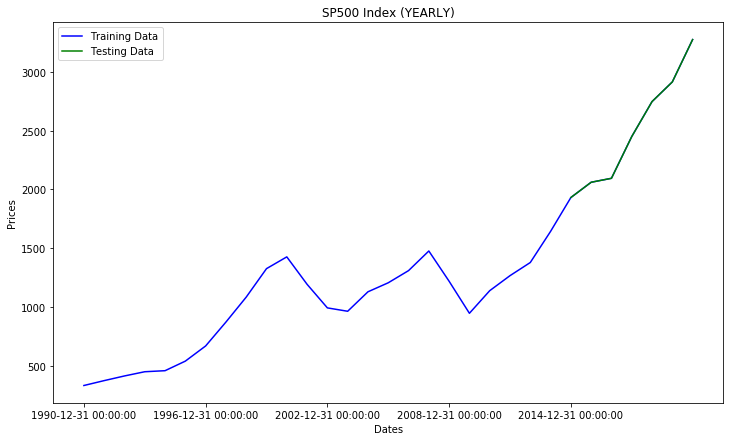

In [203]:
#graph for train and test for yearly wise data
train_data_y, test_data_y = df_y[0:int(len(df_y)*0.8)], df_y[int(len(df_y)*0.8):]
plt.figure(figsize=(12,7))
plt.title('SP500 Index (YEARLY)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_y['Close'],'blue', label='Training Data')
plt.plot(test_data_y['Close'],'green', label='Testing Data')
plt.xticks(np.arange(0,30,6),df_y['Date'][0:30:6])
plt.legend()
plt.show()

In [241]:
#Using ARIMA model on Yearly wise data and calculating perfomance metrics
train_ar_y = train_data_y['Close'].values
test_ar_y = test_data_y['Close'].values
history = [x for x in train_ar_y]
print(type(history))
predictions_y = list()
for t in range(len(test_ar_y)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_y.append(yhat)
    obs = test_ar_y[t]
    history.append(obs)
error = metrics.mean_squared_error(test_ar_y, predictions_y)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_y, predictions_y)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_y, predictions_y)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_y, predictions_y)
print('R2-Score:%.3f'% R2Score) 

<class 'list'>
Mean Squared Error: 38262.579
Symmetric Mean Absolute Percentage Error: 22.403
Mean Absolute Percenatage Error:21.583
R2-Score:0.823


Daily Basis Forecasting Perfomance
Mean Squared Error: 382.314
Symmetric Mean Absolute Percentage Error: 18.197
Mean Absolute Percenatage Error:18.620
R2-Score:0.997


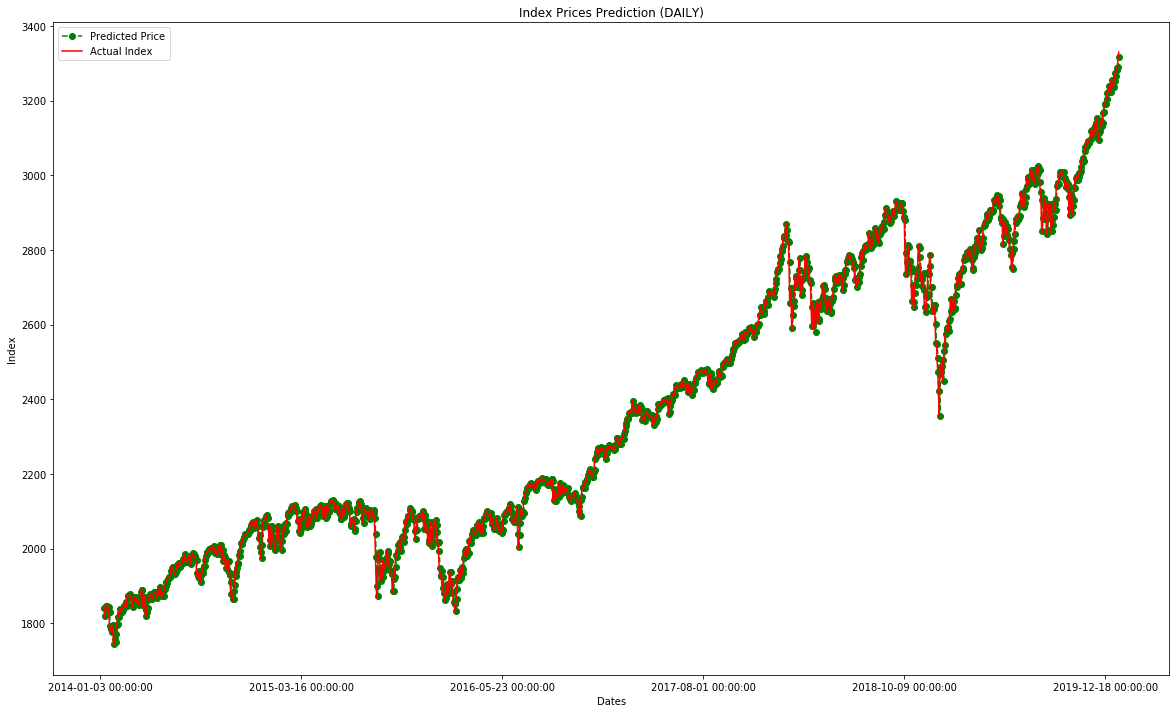

In [257]:
plt.figure(figsize=(20,12))
plt.plot(test_data_d.index, predictions_d, color='green',marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_d.index, test_data_d['Close'],color='red', label='Actual Index')
plt.title('Index Prices Prediction (DAILY)')
plt.xlabel('Dates')
plt.ylabel('Index')
plt.xticks(np.arange(6050,7600,300), df_d['Date'][6050:7600:300])
plt.legend()
print('Daily Basis Forecasting Perfomance')
error = metrics.mean_squared_error(test_ar_d, predictions_d)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_d, predictions_d)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_d, predictions_d)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_d, predictions_d)
print('R2-Score:%.3f'% R2Score) 

Weekly Basis Forecasting Perfomance
Mean Squared Error: 1061.665
Symmetric Mean Absolute Percentage Error: 18.154
Mean Absolute Percenatage Error:18.556
R2-Score:0.993


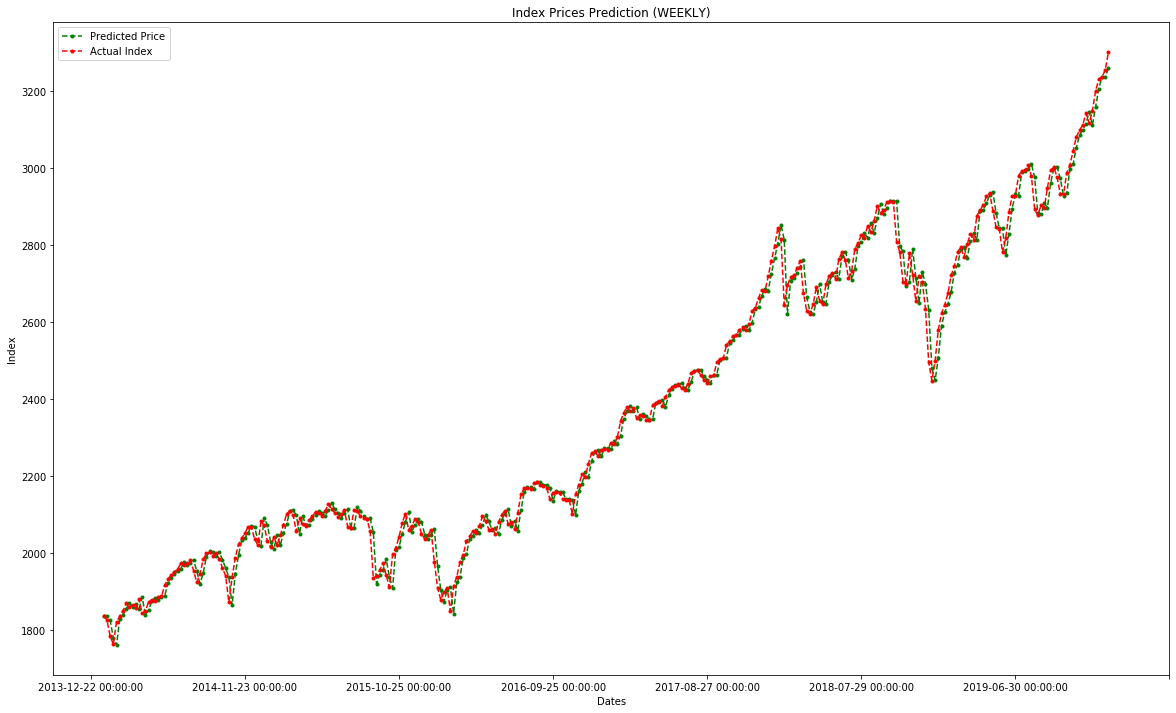

In [277]:
plt.figure(figsize=(20,12))
plt.plot(test_data_w.index, predictions_w, color='green', marker='.',linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_w.index, test_data_w['Close'], color='red', marker='.',linestyle='dashed',label='Actual Index')
plt.title('Index Prices Prediction (WEEKLY)')
plt.xlabel('Dates')
plt.ylabel('Index')
plt.xticks(np.arange(1250,1600,48), df_w['Date'][1250:1600:48])
print('Weekly Basis Forecasting Perfomance')
plt.legend()
error = metrics.mean_squared_error(test_ar_w, predictions_w)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_w, predictions_w)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_w, predictions_w)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_w, predictions_w)
print('R2-Score:%.3f'% R2Score) 

Monthly Basis Forecasting Perfomance
Mean Squared Error: 3913.727
Symmetric Mean Absolute Percentage Error: 18.279
Mean Absolute Percenatage Error:18.632
R2-Score:0.974


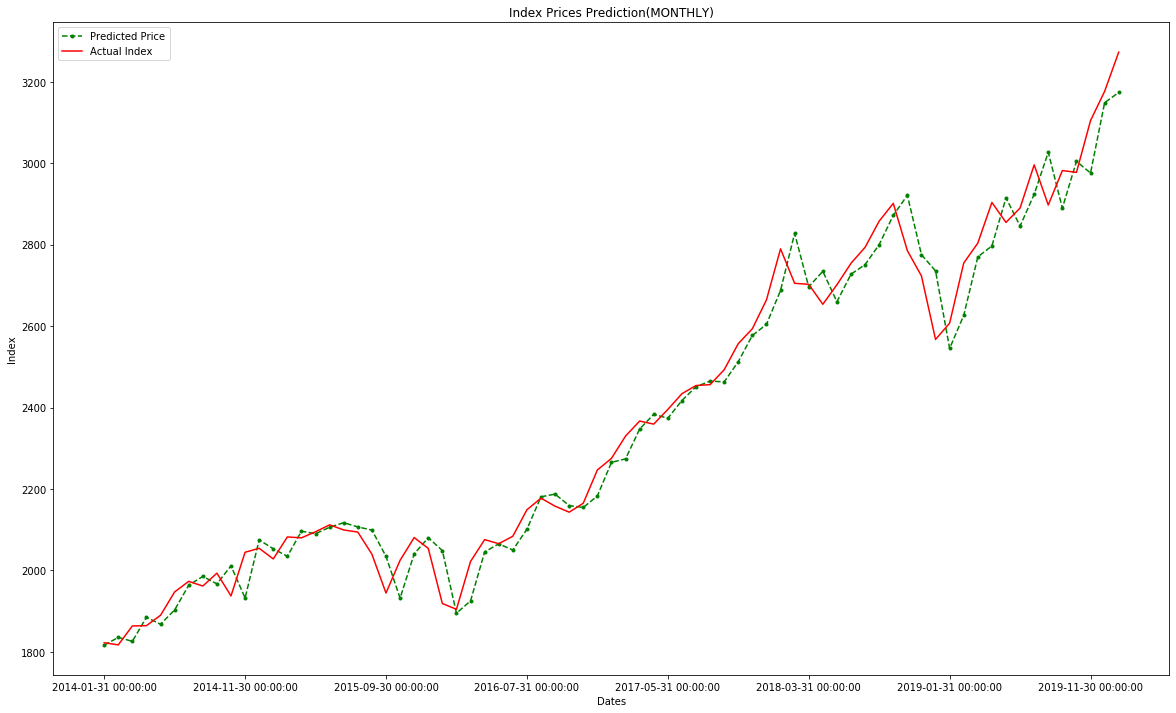

In [265]:
plt.figure(figsize=(20,12))
plt.plot(test_data_m.index, predictions_m, color='green', marker='.',linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_m.index, test_data_m['Close'], color='red', label='Actual Index')
plt.title('Index Prices Prediction(MONTHLY)')
plt.xlabel('Dates')
plt.ylabel('Index')
plt.xticks(np.arange(288,360,10), df_m['Date'][288:360:10])
print('Monthly Basis Forecasting Perfomance')
plt.legend()
error = metrics.mean_squared_error(test_ar_m, predictions_m)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_m, predictions_m)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_m, predictions_m)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_m, predictions_m)
print('R2-Score:%.3f'% R2Score) 

Yearly Basis Forecasting Perfomance
Mean Squared Error: 3913.727
Symmetric Mean Absolute Percentage Error: 18.279
Mean Absolute Percenatage Error:18.632
R2-Score:0.974


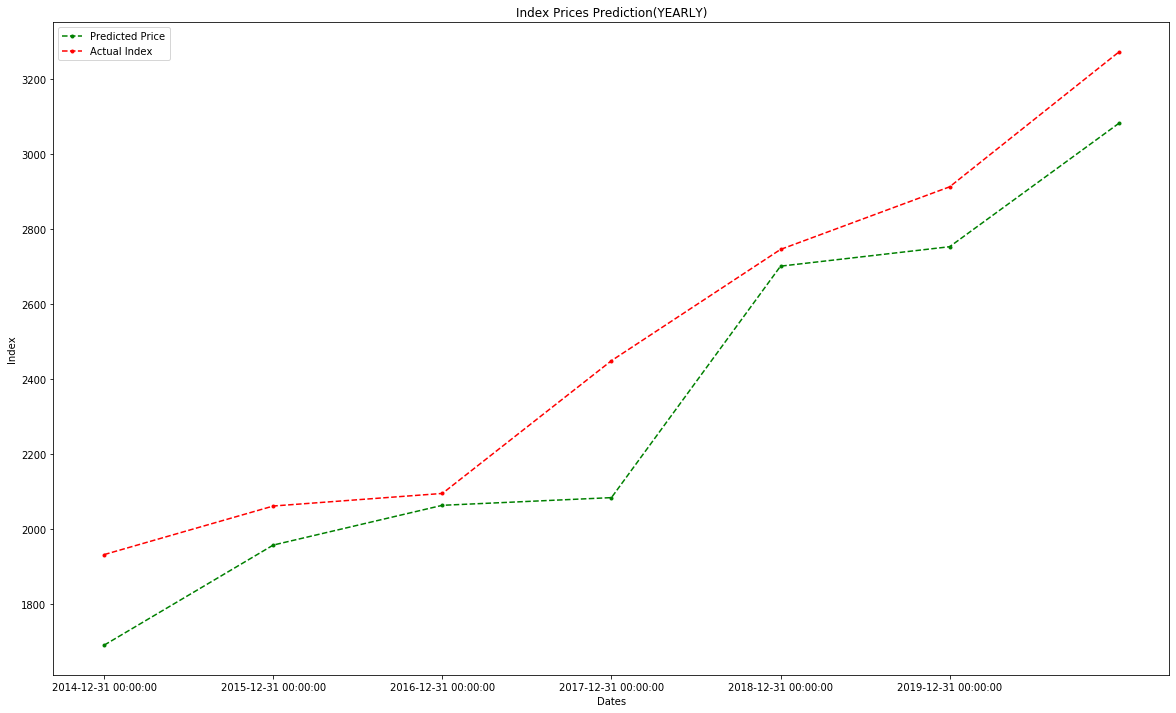

In [272]:
plt.figure(figsize=(20,12))
plt.plot(test_data_y.index, predictions_y, color='green', marker='.',linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_y.index, test_data_y['Close'], color='red', marker='.',linestyle='dashed', label='Actual Index')
plt.title('Index Prices Prediction(YEARLY)')
plt.xlabel('Dates')
plt.ylabel('Index')
plt.xticks(np.arange(24,30,1), df_y['Date'][24:30:1])
print('Yearly Basis Forecasting Perfomance')
plt.legend()
error = metrics.mean_squared_error(test_ar_m, predictions_m)
print('Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar_m, predictions_m)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error2)
error3=mean_absolute_percentage_error(test_ar_m, predictions_m)
print('Mean Absolute Percenatage Error:%.3f'%error3)
R2Score=metrics.r2_score(test_ar_m, predictions_m)
print('R2-Score:%.3f'% R2Score) 